In [11]:
# https://cream-kuchen.hatenablog.com/entry/efficient_portfolio_pyportfolioopt

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set_style('whitegrid')
japanize_matplotlib.japanize()

df = pd.read_csv('assets_class.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,国内株式,国内債券,国内リート,先進国株式,先進国債券,先進国リート,新興国株式,新興国債券,全世界株式
年月日,,,,,,,,,
2018-10-31,10845,10328,15549,14947,10892,14759,13949,10701,10000
2018-11-01,10750,10328,15638,15068,10833,14545,14175,10612,10077
2018-11-02,10928,10324,15629,15247,10891,14644,14459,10728,10209
2018-11-05,10807,10322,15670,15243,10900,14572,14845,10832,10228
2018-11-06,10934,10320,15720,15293,10918,14726,14782,10898,10259


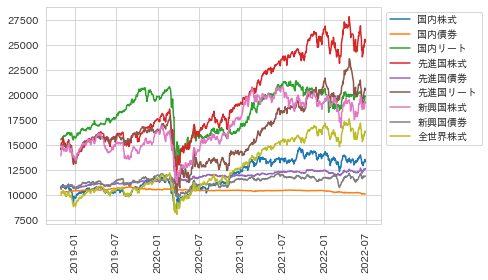

In [12]:
plt.plot(df, label=df.columns)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

In [13]:
# リターンの計算
length = len(df) - 1
days = 250  # 年間営業日数

# pd.pct_changeで変化率を計算し、一年あたりの変化率を計算する
# pct_change → (A - B) / B
df_return = 100 * ((pd.DataFrame((df.pct_change()[1:] + 1).prod()).T) ** (days / length) - 1)
df_return

,国内株式,国内債券,国内リート,先進国株式,先進国債券,先進国リート,新興国株式,新興国債券,全世界株式
0,6.009191,-0.454627,7.163377,15.964365,4.371689,9.692301,9.402492,3.128854,14.6113


,国内株式,国内債券,国内リート,先進国株式,先進国債券,先進国リート,新興国株式,新興国債券,全世界株式
0,18.273417,2.03681,23.371709,23.152524,6.475534,25.081286,20.075747,10.362006,21.208123


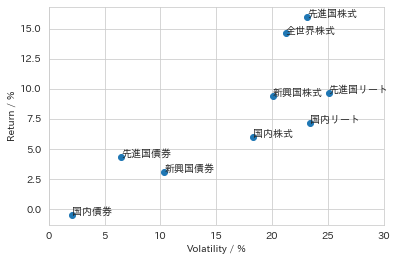

In [14]:
# リスクの計算
df_vola = (pd.DataFrame((df.pct_change()[1:]*100).std()).T) * (days)**(1/2)
display(df_vola)

plt.scatter(df_vola.iloc[0,:], df_return.iloc[0,:])
plt.xlabel('Volatility / %')
plt.ylabel('Return / %')
plt.xlim(0,30)

labels = list(df.columns)
for i, txt in enumerate(labels):
    plt.annotate(txt, (df_vola.iloc[0,i], df_return.iloc[0,i]))
    # print(i, txt, (df_vola.iloc[0,i], df_return.iloc[0,i]))

plt.show()

In [15]:
# シャープ・レシオ
# 現金資産の利子は0と仮定
df_Sharpe_ratio = df_return / df_vola
display(df_Sharpe_ratio)

,国内株式,国内債券,国内リート,先進国株式,先進国債券,先進国リート,新興国株式,新興国債券,全世界株式
0,0.328849,-0.223205,0.306498,0.68953,0.675109,0.386436,0.468351,0.301954,0.688948


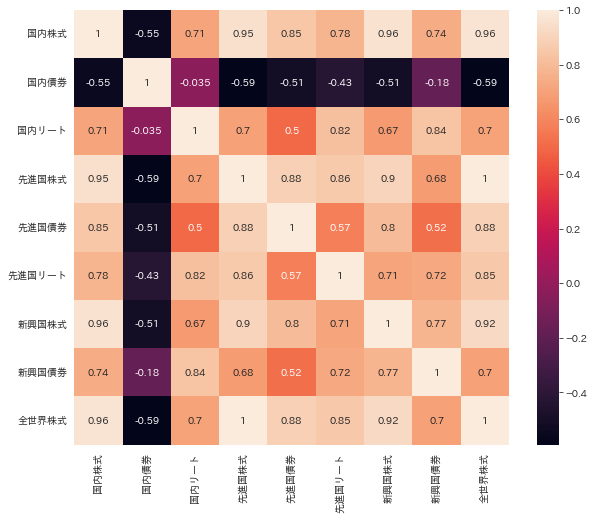

In [16]:
# 相関係数
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, square=True)
plt.show()

In [26]:
# 平均リターンの計算
# https://investengblog.com/py_n225vssp500/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

start = datetime.datetime(1980,3,31)
end = datetime.datetime(2022,6,30)

df1 = web.DataReader(['^TPX', '^GSPC'], 'yahoo', start, end)['Adj Close']
# 998405.T : TOPIX
# ^GSPC : S&P 500
# Adf Close : 終値

df1

Symbols,^GSPC,998405.T
Date,,
1980-03-31,102.089996,NaN
1980-04-01,102.180000,NaN
1980-04-02,102.680000,NaN
1980-04-03,102.150002,NaN
1980-04-07,100.190002,NaN
...,...,...
2022-06-24,3911.739990,NaN
2022-06-27,3900.110107,NaN
2022-06-28,3821.550049,NaN


In [22]:
df.columns = ['TOPIX', 'NASDAQ']
df

,TOPIX,NASDAQ
Date,,
1980-03-31,102.089996,NaN
1980-04-01,102.180000,NaN
1980-04-02,102.680000,NaN
1980-04-03,102.150002,NaN
1980-04-07,100.190002,NaN
...,...,...
2022-06-24,3911.739990,NaN
2022-06-27,3900.110107,NaN
2022-06-28,3821.550049,NaN
